# Premier League Transfer Spend Analysis

Objective: Transfer speculation and news is frequently the talk of football fans during the summer break. Fans often want their team to spend more during transfer seasons to get better players, thus better equipping the team to succeed in league play. This analysis seeks to determine whether there exists a correlation between transfer spend and premier league success, and, if such a correlation exists, to what degree transfer spend affects Premier League success. Success in the Premier League can relate to either placement or points for the season.

About the Data
* The data was collected via personally created Selenium web scraping techniques from various sources.
* Transfer data was collected from transfermarkt, a German website that receives user-inputted data in addition to using its own data collection techniques from football scouts and other professionals. source: https://www.transfermarkt.us/premier-league/transfers/wettbewerb/GB1/plus/?saison_id=2014&s_w=s&leihe=1&intern=0&intern=1
* Wage bill data was collected from FBRef, which its data from Capology, one of the leading data collectors for professional football salaries. source: https://fbref.com/en/comps/9/wages/Premier-League-Wages
* Match stats were collected from FBRef, as well. Premier League tables per season are created to ensure that match data is correct. source: https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures
* Only data from 2014 to 2024 was collected, for the purposes of this analysis.

In [2]:
# Import libraries necessary for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
match_stats_df = pd.read_csv('../pl_match_stats_2014_2024.csv')
transfer_df = pd.read_csv('../pl_transfers_2014_2024_cleaned.csv')

## Transfer Data EDA
1. Analyze the age of transfers
2. Analyze transfer counts
3. Analyze Fees and Market Value

In [665]:
# Look at the column and data types.
# There are no null values in the dataset, as I collected it directly from website and cleaned it in Sheets
transfer_df['is_loan'] = transfer_df['Fee'] == 0
transfer_df.drop('Unnamed: 0', axis = 1, inplace = True)
transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            8170 non-null   object 
 1   Season          8170 non-null   object 
 2   Time            8170 non-null   object 
 3   Name            8170 non-null   object 
 4   Status          8170 non-null   object 
 5   Position        8170 non-null   object 
 6   Market Value    8170 non-null   float64
 7   Age             8170 non-null   int64  
 8   Fee             8170 non-null   float64
 9   is_loan         8170 non-null   bool   
 10  is_loan_return  8170 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 646.4+ KB


### 1. Age Analysis

In [666]:
# Now let's examine the statistics for the age of players transferring in and out of clubs
# Based on the data, the mean is a full year higher for players transferring out, which suggests thsoe players transferring out of clubs are on average older than the ones transferring in (which makes logical sense)
print("Stats for Incoming Transfers\n")
print(transfer_df[transfer_df['Status'] == 'In']['Age'].describe())

print("-------------------------------------------------")

print("Stats for Outgoing Transfers\n")
print(transfer_df[transfer_df['Status'] == 'Out']['Age'].describe())

Stats for Incoming Transfers

count    4086.000000
mean       23.871757
std         3.999596
min        16.000000
25%        21.000000
50%        23.000000
75%        26.000000
max        42.000000
Name: Age, dtype: float64
-------------------------------------------------
Stats for Outgoing Transfers

count    4084.000000
mean       25.057052
std         4.485143
min        17.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        44.000000
Name: Age, dtype: float64


Text(0.5, 0, 'Transfer Status')

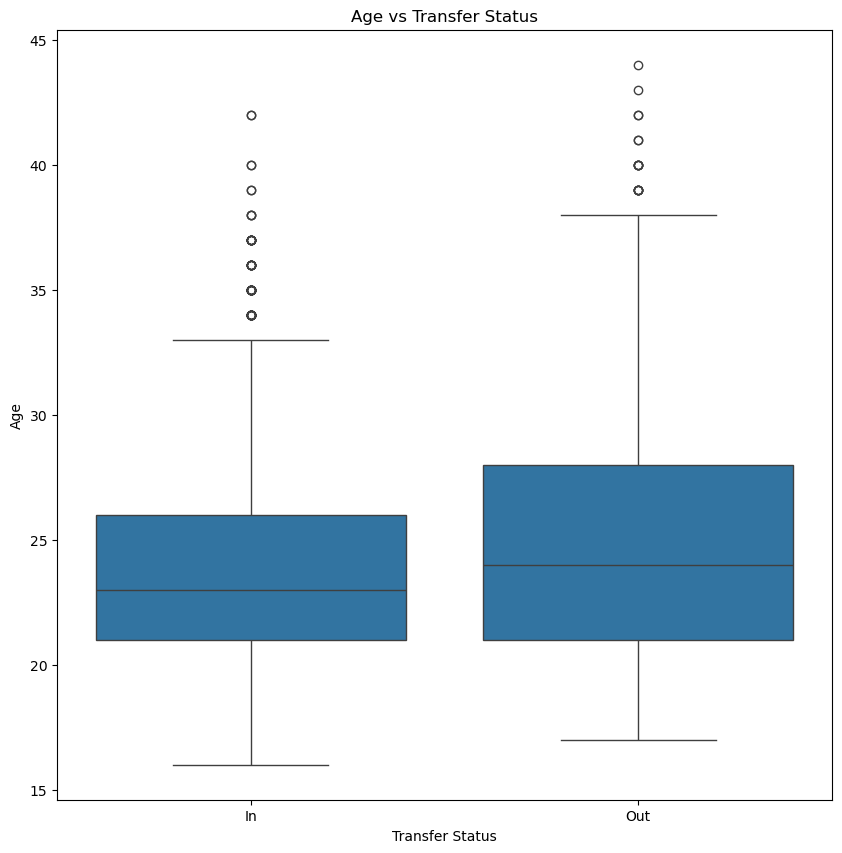

In [667]:
# Let's take the data and visualize it
# Here we can see the visual differences

plt.figure(figsize = (10, 10))

sns.boxplot(data = transfer_df, x = 'Status', y = 'Age')
plt.title('Age vs Transfer Status')
plt.xlabel('Transfer Status')

<Axes: title={'center': 'Actual Fee vs Age'}, xlabel='Age (Years)', ylabel='Transfer Fee (Euros)'>

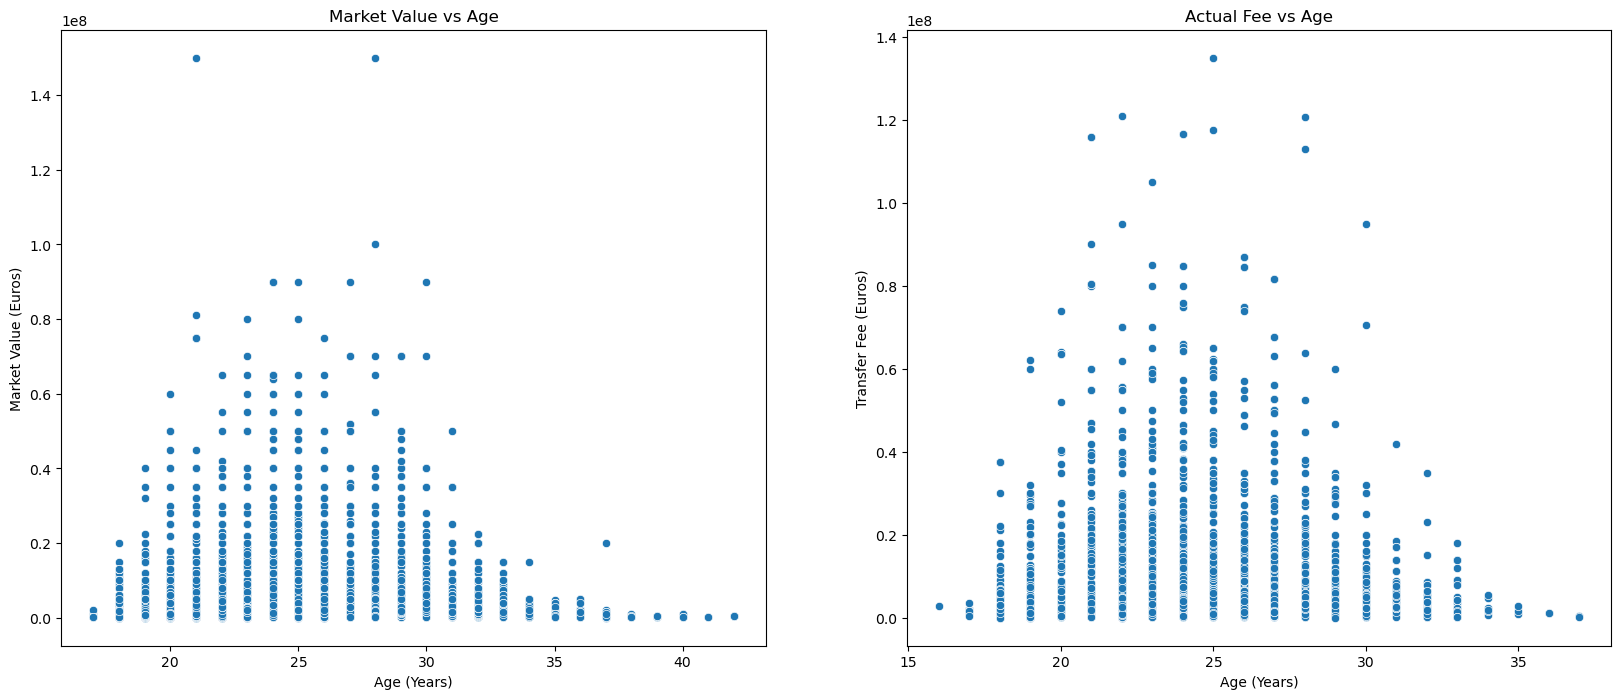

In [668]:
# Market Value with respect to age
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axs[0].set_title('Market Value vs Age')
axs[0].set_xlabel('Age (Years)')
axs[0].set_ylabel('Market Value (Euros)')

axs[1].set_title('Actual Fee vs Age')
axs[1].set_xlabel('Age (Years)')
axs[1].set_ylabel('Transfer Fee (Euros)')
sns.scatterplot(data = transfer_df[transfer_df['Market Value'] != 0], x = 'Age', y = 'Market Value', ax = axs[0])
sns.scatterplot(data = transfer_df[transfer_df['Fee'] != 0], x = 'Age', y = 'Fee', ax = axs[1])


<Axes: xlabel='Age', ylabel='Fee'>

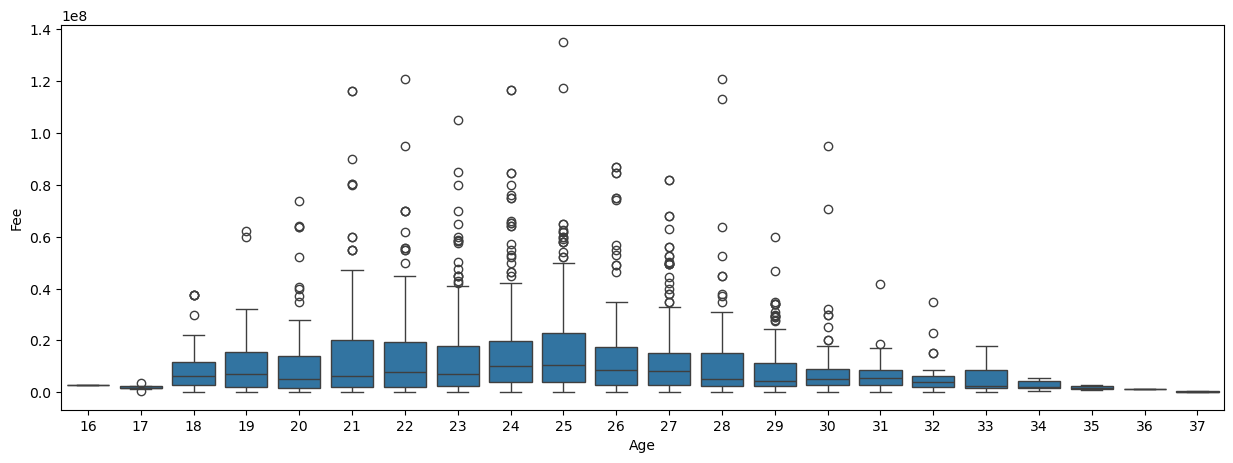

In [669]:
# Visualization of Actual Transfer Fee vs Age
# Here we can see that the data is heavily right-skewed, as there are very few players accounting for much of the transfer spend
plt.figure(figsize = (15, 5))

sns.boxplot(data = transfer_df[transfer_df['Fee'] != 0], x = 'Age', y = 'Fee')

Text(0.5, 1.0, 'Number of Players per Age per Position')

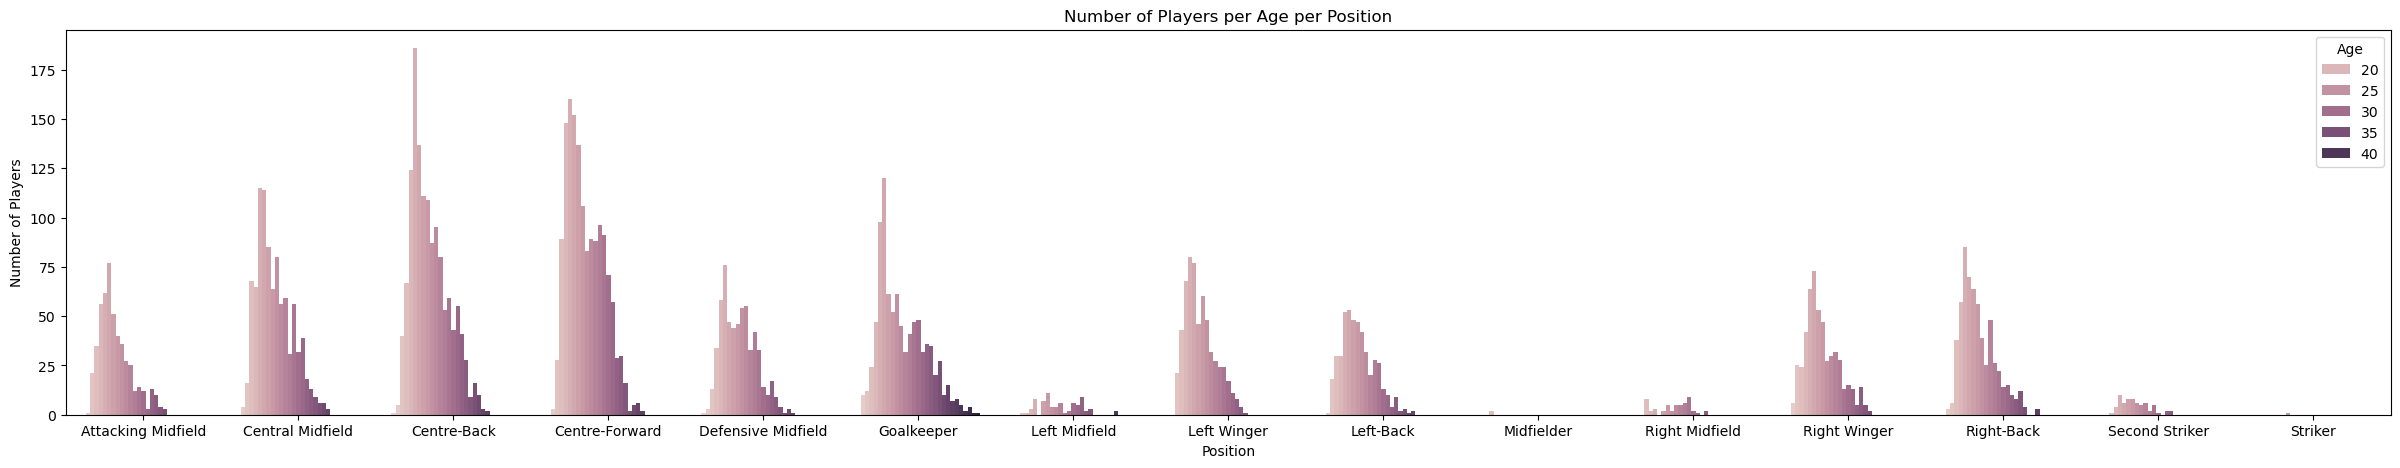

In [670]:
# Show count of ages per position
plt.figure(figsize = (30,5))
sns.barplot(data = transfer_df.groupby(['Position', 'Age'], as_index = False).size(), x = 'Position', y = 'size',  hue = 'Age')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players per Age per Position')


### 2. Analyzing Transfer Counts

In [671]:
# Transfer Counts by Team per Season
transfer_count_df = transfer_df.groupby(['Team', 'Season', 'Status'], as_index = False).size().sort_values(by = ['Team', 'Season', 'Status'])
transfer_count_df.rename(columns = {'size' : 'Total Transfers'}, inplace = True)
transfer_count_df.head()

,Team,Season,Status,Total Transfers
0,AFC Bournemouth,2015/2016,In,36
1,AFC Bournemouth,2015/2016,Out,33
2,AFC Bournemouth,2016/2017,In,19
3,AFC Bournemouth,2016/2017,Out,31
4,AFC Bournemouth,2017/2018,In,15


In [672]:
# Find team with most transfers in during a season
# Both Chelsea FC and Nottingham Forest FC had record high transfers (42) incoming during seasons 2014/2015 and 2022/2023 respectfully
transfer_count_df[transfer_count_df['Total Transfers'] == transfer_count_df[(transfer_count_df['Status'] == 'In')]['Total Transfers'].max()].head()

,Team,Season,Status,Total Transfers
85,Chelsea FC,2014/2015,In,49


In [673]:
# Find team with most transfers out during a season
# Chelsea FC had the record high for Total Transfers out during season 2014/2015
transfer_count_df[transfer_count_df['Total Transfers'] == transfer_count_df[(transfer_count_df['Status'] == 'Out')]['Total Transfers'].max()].head()

,Team,Season,Status,Total Transfers
397,Wolverhampton Wanderers,2018/2019,Out,46


In [674]:
# Find team with fewest transfers in during a season
# Tottenham Hotspur FC has the season with the fewest transfers in (4) during season 2018/2019. They must've had a great team that season.
transfer_count_df[transfer_count_df['Total Transfers'] == transfer_count_df[(transfer_count_df['Status'] == 'In')]['Total Transfers'].min()].head()

,Team,Season,Status,Total Transfers
370,West Ham United,2021/2022,In,2
371,West Ham United,2021/2022,Out,2


Text(0.5, 1.0, 'Total Transfers (In/Out) for Tottenham Hotspur FC from 2014/2015 to 2023/2024')

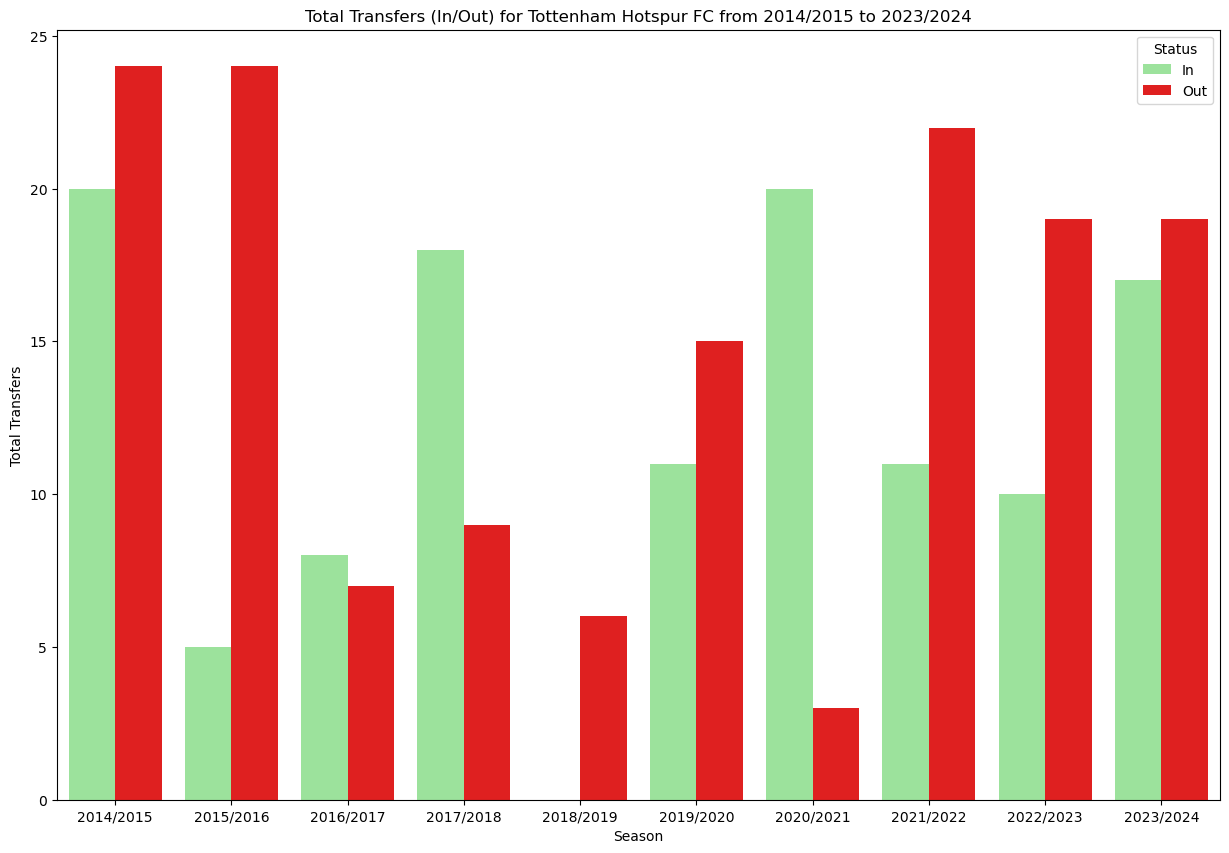

In [675]:
# Bar plot for transfers for specific team across seasons
# This graph shows Tottenham Hotspur FC transfers from 2014 to 2024
plt.figure(figsize = (15, 10))
palette = ['lightgreen', 'red']
sns.barplot(data = transfer_count_df[transfer_count_df['Team'] == "Tottenham Hotspur FC"], x = 'Season', y = 'Total Transfers', hue = 'Status', palette = palette)
plt.title('Total Transfers (In/Out) for Tottenham Hotspur FC from 2014/2015 to 2023/2024')

Text(0, 0.5, 'Total Transfers for League')

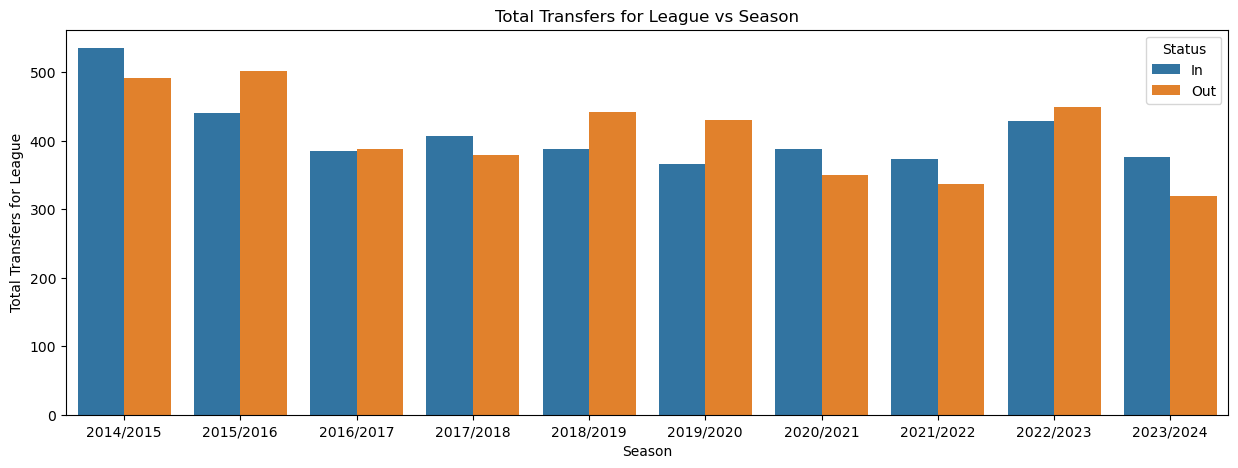

In [676]:
# Bar Plot showcasing the total transfers in and out for all teams per season

plt.figure(figsize = (15, 5))
sns.barplot(data = transfer_count_df.groupby(['Season', 'Status'], as_index = False).sum('Total Transfers'), x = 'Season', y = 'Total Transfers', hue = 'Status')
plt.title('Total Transfers for League vs Season')
plt.xlabel('Season')
plt.ylabel('Total Transfers for League')

## 3. Market Value and Fee Analysis

In [677]:
# Find biggest transfer by Market Value and Fee
# As we can see from the data, Eden Hazard and Erling Haaland, in their respective seasons of 2019/2020 and 2022/2023, were evaluated at 150M euros.
transfer_df[transfer_df['Market Value'] == transfer_df['Market Value'].max()]

,Team,Season,Time,Name,Status,Position,Market Value,Age,Fee,is_loan,is_loan_return
2230,Chelsea FC,2023/2024,SUMMER,Eden Hazard,Out,Left Winger,150000000.0,28,120800000.0,False,0
4726,Manchester United FC,2020/2021,SUMMER,Erling Haaland,In,Centre-Forward,150000000.0,21,60000000.0,False,0


In [678]:
# The biggest transfer by Fee was the sale of Coutinho in 2017/2018 for 135M euros.
transfer_df[transfer_df['Fee'] == transfer_df['Fee'].max()]

,Team,Season,Time,Name,Status,Position,Market Value,Age,Fee,is_loan,is_loan_return
4210,Manchester City FC,2017/2018,WINTER,Philippe Coutinho,Out,Attacking Midfield,90000000.0,25,135000000.0,False,0


In [679]:
# Biggest purchase by Fee
# Enzo Fernandez was purchased by Chelsea in 2022/2023 WINTER for 121M euros.
transfer_df[(transfer_df['Fee'] == transfer_df[(transfer_df['Status'] == 'In')]['Fee'].max())]

,Team,Season,Time,Name,Status,Position,Market Value,Age,Fee,is_loan,is_loan_return
2406,Crystal Palace FC,2017/2018,WINTER,Enzo Fernández,In,Central Midfield,55000000.0,22,121000000.0,False,0


In [680]:
# Create a new column to evaluate how much a club overpaid for their player
transfer_df['Over Paid Fees'] = transfer_df['Fee'] - transfer_df['Market Value']
transfer_df.head()

,Team,Season,Time,Name,Status,Position,Market Value,Age,Fee,is_loan,is_loan_return,Over Paid Fees
0,AFC Bournemouth,2015/2016,SUMMER,Tyrone Mings,In,Centre-Back,6000000.0,22,11300000.0,False,0,5300000.0
1,AFC Bournemouth,2015/2016,SUMMER,Max Gradel,In,Left Winger,6500000.0,27,10000000.0,False,0,3500000.0
2,AFC Bournemouth,2015/2016,SUMMER,Glenn Murray,In,Centre-Forward,2500000.0,31,5400000.0,False,0,2900000.0
3,AFC Bournemouth,2015/2016,SUMMER,Lee Tomlin,In,Second Striker,1750000.0,26,4300000.0,False,0,2550000.0
4,AFC Bournemouth,2015/2016,SUMMER,Artur Boruc,In,Goalkeeper,1000000.0,35,0.0,True,0,-1000000.0


In [681]:
# Find player who was the most over paid for transfer based on market value
# Chelsea paid 66M euros more than the Market Value for Enzo Fernandez in 2022/2023
transfer_df[(transfer_df['Over Paid Fees'] == transfer_df[(transfer_df['Status'] == 'In')]['Over Paid Fees'].max())]

,Team,Season,Time,Name,Status,Position,Market Value,Age,Fee,is_loan,is_loan_return,Over Paid Fees
2406,Crystal Palace FC,2017/2018,WINTER,Enzo Fernández,In,Central Midfield,55000000.0,22,121000000.0,False,0,66000000.0


In [682]:
# Find the best bargain player (MV >>> Fee)
# Manchester City made the "best" purchase with Erling Haaland for 90M euros less than his Market Value
transfer_df[(transfer_df['Over Paid Fees'] == transfer_df[(transfer_df['Status'] == 'In')]['Over Paid Fees'].min())]

,Team,Season,Time,Name,Status,Position,Market Value,Age,Fee,is_loan,is_loan_return,Over Paid Fees
4726,Manchester United FC,2020/2021,SUMMER,Erling Haaland,In,Centre-Forward,150000000.0,21,60000000.0,False,0,-90000000.0


Text(0, 0.5, 'Total Over Paid Fees (Euros)')

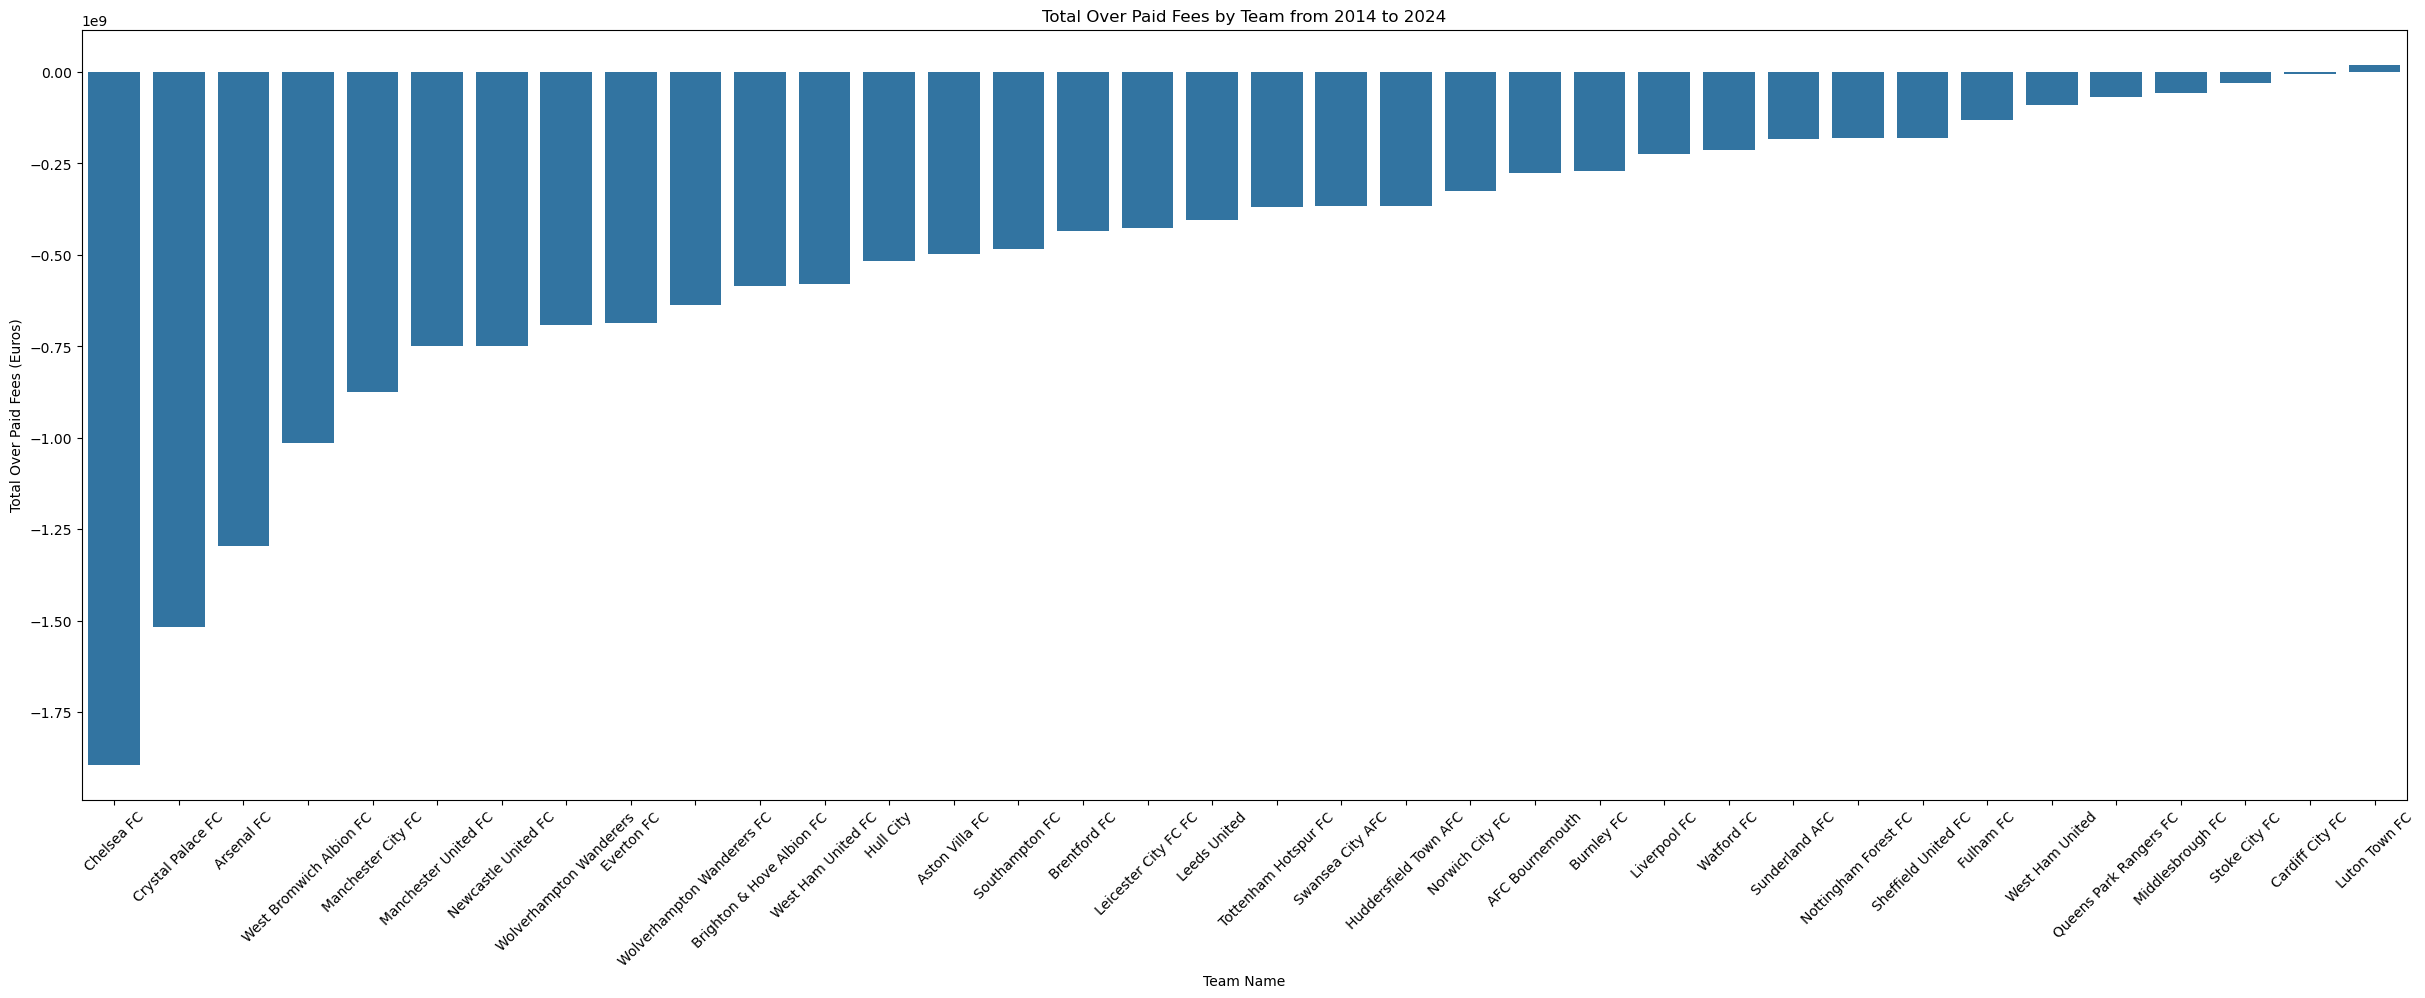

In [683]:
# Total Over Paid Fees (Actual Fee - Market Value) from 2014 to 2024 vs Team


plt.figure(figsize = (30, 10))
sns.barplot(data = transfer_df.groupby('Team', as_index = False)['Over Paid Fees'].sum().sort_values(by = 'Over Paid Fees'), x = 'Team', y = 'Over Paid Fees')
plt.xticks(rotation = 45)
plt.title('Total Over Paid Fees by Team from 2014 to 2024')
plt.xlabel('Team Name')
plt.ylabel('Total Over Paid Fees (Euros)')

              Position  size
3       Centre-Forward  1062
2          Centre-Back   978
1     Central Midfield   749
5           Goalkeeper   715
7          Left Winger   468
11          Right-Back   451
4   Defensive Midfield   429
0   Attacking Midfield   396
10        Right Winger   377
8            Left-Back   356
6        Left Midfield    61
12      Second Striker    50
9       Right Midfield    35


Text(0, 0.5, 'Number of Players Over-Valued')

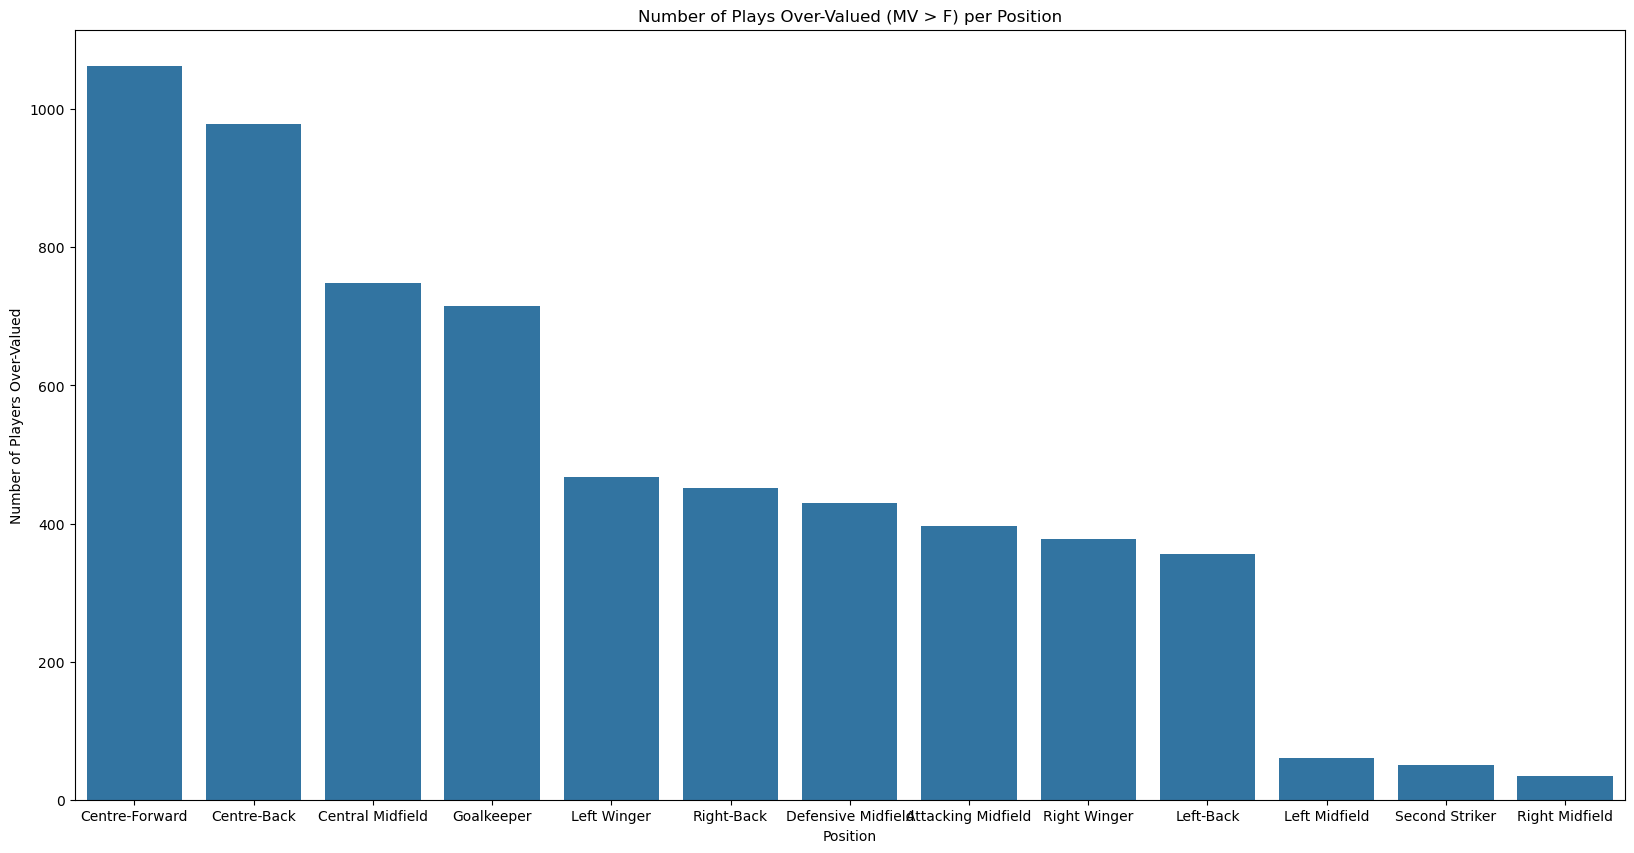

In [684]:
# Find positions that are over-valued
# The bar graph shows the number of over-valued players per position, which shows that Centre-Forwards are frequently over-valued in comparison to what clubs pay for them

print(transfer_df[transfer_df['Market Value'] > transfer_df['Fee']].groupby('Position', as_index = False).size().sort_values(by = 'size', ascending = False))

plt.figure(figsize = (20, 10))

sns.barplot(data = transfer_df[transfer_df['Market Value'] > transfer_df['Fee']].groupby('Position', as_index = False).size().sort_values(by = 'size', ascending = False), x = 'Position', y = 'size')
plt.title('Number of Plays Over-Valued (MV > F) per Position')
plt.xlabel('Position')
plt.ylabel('Number of Players Over-Valued')

              Position  size
3       Centre-Forward   254
2          Centre-Back   235
1     Central Midfield   119
4   Defensive Midfield   117
10        Right Winger    95
7          Left Winger    93
5           Goalkeeper    80
8            Left-Back    77
0   Attacking Midfield    68
11          Right-Back    62
6        Left Midfield     8
12      Second Striker     8
9       Right Midfield     4


Text(0, 0.5, 'Number of Players Under-Valued')

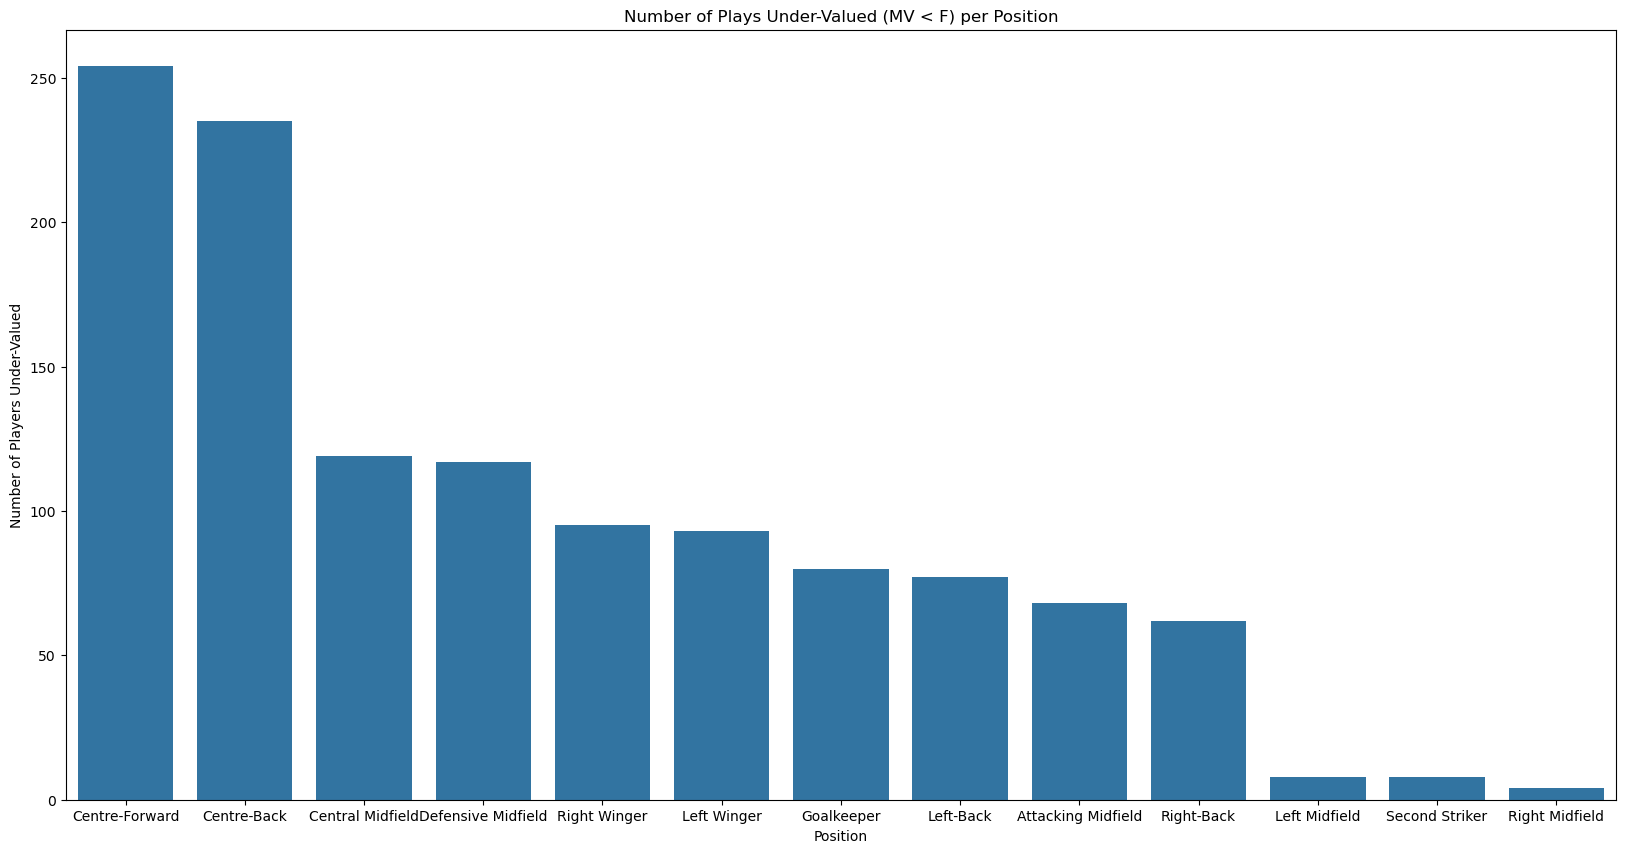

In [685]:
# Find positions that are under-valued
# The bar graph shows the number of under-valued players per position, which shows that Centre-Forwards are also the most under-valued (market value < actual fee paid) players.

print(transfer_df[transfer_df['Market Value'] < transfer_df['Fee']].groupby('Position', as_index = False).size().sort_values(by = 'size', ascending = False))

plt.figure(figsize = (20, 10))

sns.barplot(data = transfer_df[transfer_df['Market Value'] < transfer_df['Fee']].groupby('Position', as_index = False).size().sort_values(by = 'size', ascending = False), x = 'Position', y = 'size')
plt.title('Number of Plays Under-Valued (MV < F) per Position')
plt.xlabel('Position')
plt.ylabel('Number of Players Under-Valued')

In [686]:

position_overvalued = transfer_df[transfer_df['Market Value'] > transfer_df['Fee']].groupby('Position', as_index = False).size()
position_undervalued = transfer_df[transfer_df['Market Value'] < transfer_df['Fee']].groupby('Position', as_index = False).size()
position_overvalued.rename(columns = { 'size' : 'over_valued'}, inplace = True)
position_undervalued.rename(columns = { 'size' : 'under_valued'}, inplace = True)

position_over_under_valued = pd.concat([position_overvalued, position_undervalued['under_valued']], axis = 1)
position_over_under_valued.head()

position_over_under_valued['over_valued_pct'] = (position_over_under_valued['over_valued']/(position_over_under_valued['over_valued'] + position_over_under_valued['under_valued'])*100).astype(float)
position_over_under_valued['under_valued_pct'] = (position_over_under_valued['under_valued']/(position_over_under_valued['over_valued'] + position_over_under_valued['under_valued'])*120).astype(float)

position_over_under_valued.head(10)

,Position,over_valued,under_valued,over_valued_pct,under_valued_pct
0,Attacking Midfield,396,68,85.344828,17.586207
1,Central Midfield,749,119,86.290323,16.451613
2,Centre-Back,978,235,80.626546,23.248145
3,Centre-Forward,1062,254,80.699088,23.161094
4,Defensive Midfield,429,117,78.571429,25.714286
5,Goalkeeper,715,80,89.937107,12.075472
6,Left Midfield,61,8,88.405797,13.913043
7,Left Winger,468,93,83.422460,19.893048
8,Left-Back,356,77,82.217090,21.339492
9,Right Midfield,35,4,89.743590,12.307692


Text(0, 0.5, 'Percentage of Players who are Over-Valued')

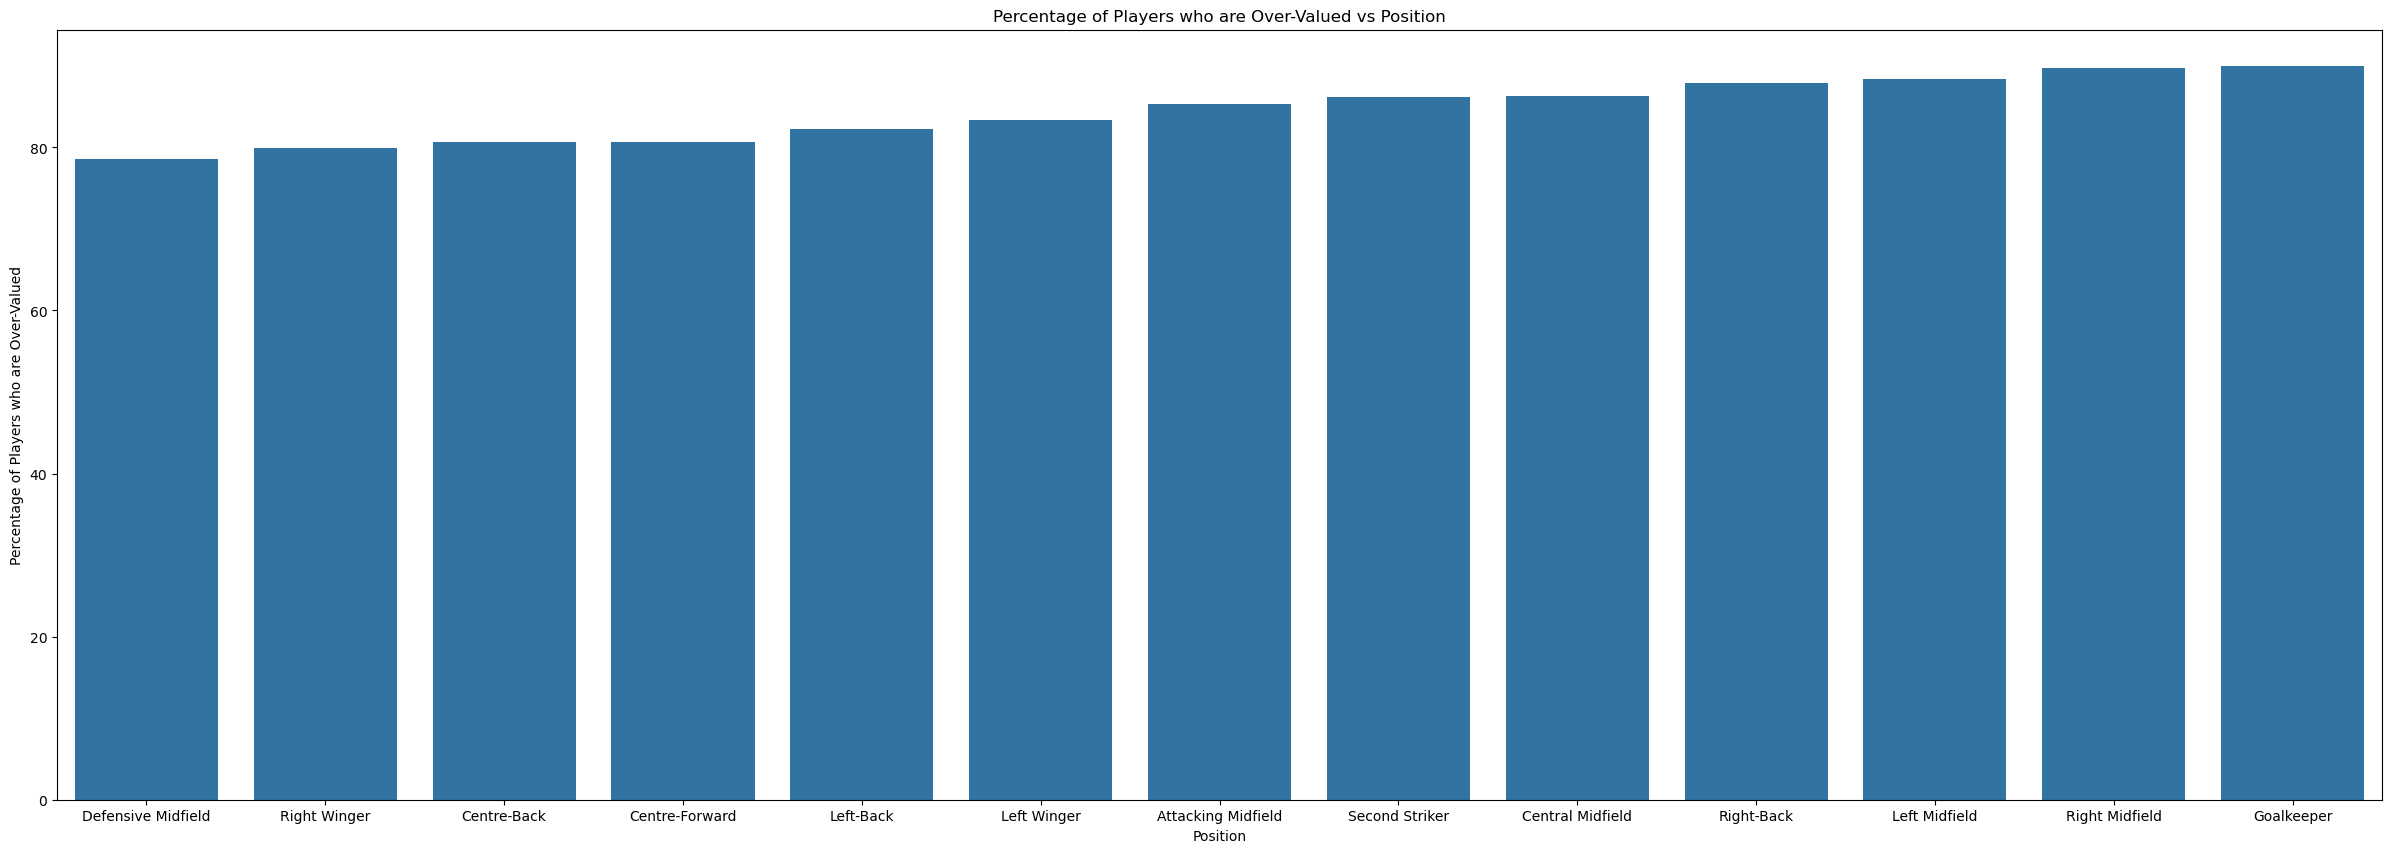

In [687]:
# The bar plot for over-valued transfer count percentage shows a consistent % of each position being comprised of over valued players
# Goalkeeper is the most over-valued position with 87.5% of transfers paying less in fees than market value for the players. GK over-valued % is 10% higher than the position with the fewest over-valued players, Defensive Midfield with 77.84% of transfers being over-valued.

plt.figure(figsize = (30,10))
sns.barplot(data = position_over_under_valued.sort_values(by = 'over_valued_pct', ascending = True), x = 'Position', y = 'over_valued_pct')
plt.title('Percentage of Players who are Over-Valued vs Position')
plt.ylabel('Percentage of Players who are Over-Valued')

Text(0, 0.5, 'Sum of Transfer Fees')

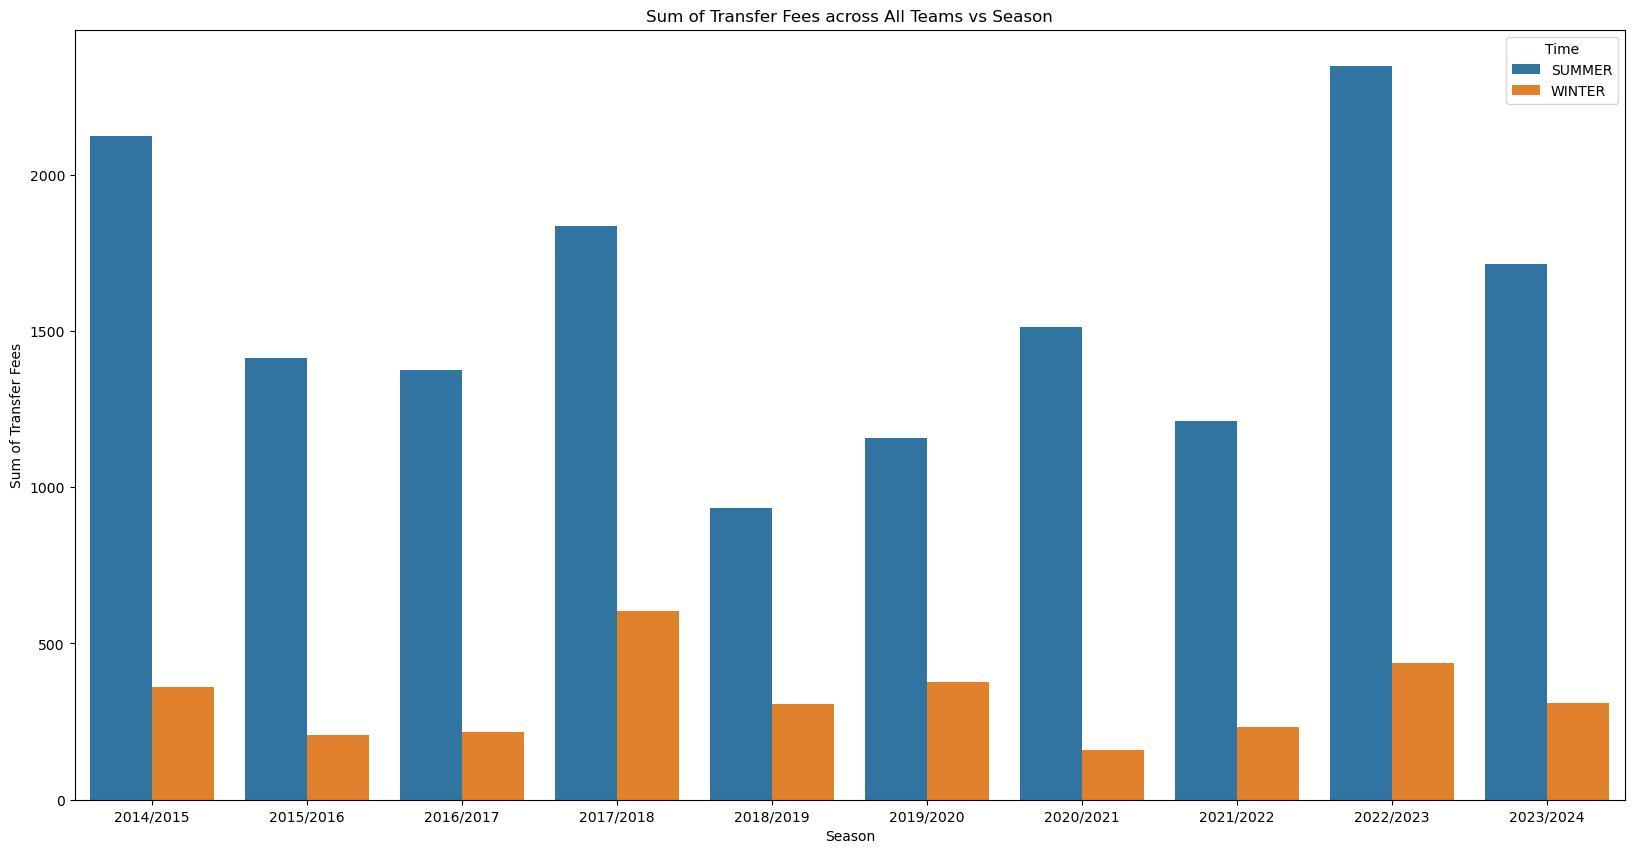

In [688]:
temp_df = transfer_df[transfer_df['Status'] == 'In'].groupby(['Season', 'Time'], as_index = False)['Fee'].sum()

temp_df['Fee'] = (temp_df['Fee'] / 1000000).astype(float)


plt.figure(figsize = (20, 10))
sns.barplot(data = temp_df, x = 'Season', y = 'Fee', hue = 'Time')
plt.title('Sum of Transfer Fees across All Teams vs Season')
plt.ylabel('Sum of Transfer Fees')

In [689]:
# Find top 10 most transferred players and how many times they were transferred into a PL team
transfer_df[(transfer_df['Status'] == 'In') & (~transfer_df['is_loan'])].groupby('Name', as_index = False).size().sort_values(by = 'size', ascending = False).head(10).rename(columns = {'size' : 'Times Transferred'})

,Name,Times Transferred
206,Danny Ings,4
369,Harry Maguire,4
173,Chris Wood,4
467,Jordon Mutch,4
33,Alex McCarthy,4
932,Wilfried Bony,4
793,Robert Snodgrass,4
801,Romelu Lukaku,4
461,Jordan Ayew,3
404,Jake Livermore,3


Text(0, 0.5, 'Number of Loans')

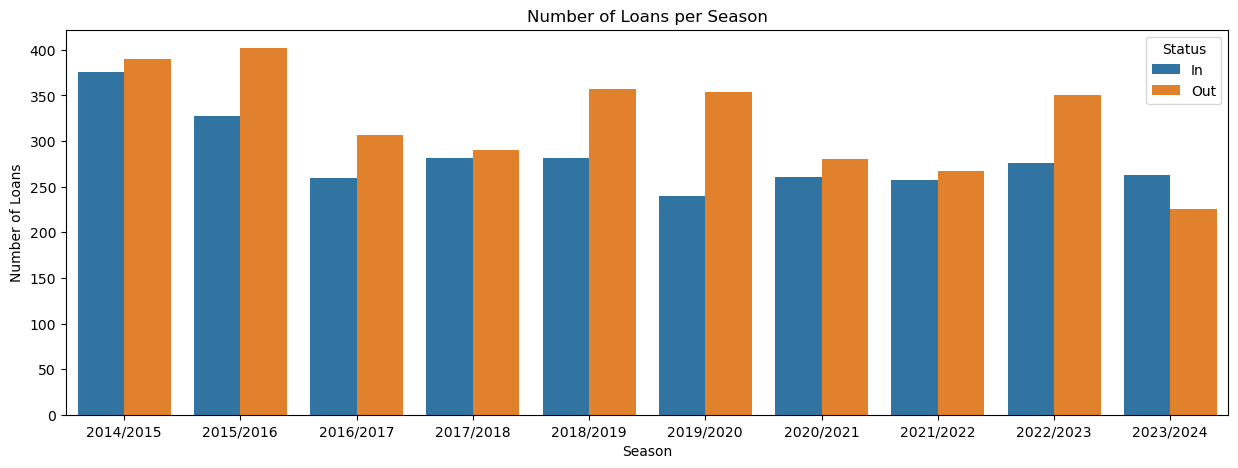

In [693]:
plt.figure(figsize = (15, 5))
sns.barplot(data = transfer_df.groupby(['Season', 'Status'], as_index = False)['is_loan'].sum(), x = 'Season', y = 'is_loan', hue = 'Status')
plt.title('Number of Loans per Season')
plt.ylabel('Number of Loans')